In [1]:
import pandas as pd
import numpy as np
import json
from pandas import DataFrame
from pandas.io.json import json_normalize
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import nltk
import string
import re
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

Using TensorFlow backend.


In [2]:
df = pd.read_excel("/home/surya/Nightingale_Chat.xlsx",sheet_name = "All", header=0)
print(df.rating.value_counts())
# df.columns

low       567
high      446
medium    426
Name: rating, dtype: int64


In [3]:
# df = pd.read_excel("/home/surya/NG_Chatdata.xlsx",sheet_name = "all", header=0)
# print(df.rating.value_counts())

In [320]:
print(df.head())

                                        patient_chat  rating  \
0  female, 55 years, 75 kg and obese. hypertensiv...     NaN   
1  I'm 22 and male and I have gotten terrible mig...     NaN   
2  My wife is constantly suffering from high bloo...     NaN   
3  I get head aches multiple time times a week I'...     NaN   
4  I recently suffered a substantial loss of belo...     NaN   

                                       clean_doc_voc  
0  female 55 years 75 kg obese hypertensive 16011...  
1  im 22 male gotten terrible migraines regular b...  
2  wife constantly suffering high blood pressure ...  
3  get head aches multiple time times week ive ro...  
4  recently suffered substantial loss beloved obj...  


In [301]:
def load_file(filename):
    with open(filename) as f:
        d = json.load(f)
        df = DataFrame(d)
        f.close()
    return df

punc_ = set(string.punctuation)

In [302]:
def clean_document(doc) :
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stop_words = set(stopwords.words('english'))
    tokens = doc.lower().split()
#     tokens = [w for w in tokens if '@' not in w]
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha() or word.isalnum()]
    stop_words = set(stopwords.words('english'))
    #remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in punc_]
    tokens = [re.sub('[^A-Za-z0-9]+', '', word)  for word in tokens]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

def preprocess_documents(docs):
    clean_docs = [clean_document(doc) for doc in docs]
    return clean_docs

In [303]:
docs = list(df.patient_chat)

In [304]:
clean_docs = preprocess_documents(docs)

## Define Vocobulary

In [306]:
vocab = Counter()

# load doc and add to vocab
def add_doc_to_vocab(doc,vocab):
    vocab.update(doc)
    return vocab

# load all docs in a directory
def process_docs(clean_docs, vocab):
    for doc in clean_docs:
        vocab = add_doc_to_vocab(doc, vocab)
    return vocab

vocab = process_docs(clean_docs, vocab)

In [307]:
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

2947


In [308]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
    
# save tokens to a vocabulary file
save_list(tokens, 'nightingale_vocab.txt')

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load doc, clean and return line of tokens
def doc_to_line(doc, vocab):
    # filter by vocab
    tokens = [w for w in doc if w in vocab]
    return ' '.join(tokens)

In [321]:
# load the vocabulary
vocab_filename = 'nightingale_vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [322]:
doc_to_line(clean_docs[0], vocab)

'female 55 years 75 kg obese hypertensive 160110 hg doctor prescribes olmesartan suffering severe headache'

In [323]:
clean_doc_voc = []
for doc in clean_docs:
    clean_doc_voc.append(doc_to_line(doc, vocab))

In [324]:
df["clean_doc_voc"] = clean_doc_voc

In [325]:
df.columns

Index(['patient_chat', 'rating', 'clean_doc_voc'], dtype='object')

In [326]:
df.rating  = df.rating.map({'low':0, 'medium':1, 'high' : 2})

In [327]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
train, test = train_test_split(df[["clean_doc_voc","rating" ]], test_size=0.2)

xtrain_docs , y_train_docs= train["clean_doc_voc"] , train["rating"]
xtest_docs , y_test_docs= test["clean_doc_voc"] , test["rating"]

In [328]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [329]:
# encode data
tokenizer = create_tokenizer(xtrain_docs)
Xtrain = tokenizer.texts_to_matrix(xtrain_docs, mode='freq' )
Xtest = tokenizer.texts_to_matrix(xtest_docs, mode='freq')

In [330]:
print((Xtrain.shape ,y_train_docs.shape))
print((xtest_docs.shape, y_test_docs.shape))

((1151, 2892), (1151,))
((288,), (288,))


In [336]:
y_train_docs

671    NaN
444    NaN
1212   NaN
1144   NaN
332    NaN
1196   NaN
570    NaN
1338   NaN
392    NaN
817    NaN
1141   NaN
187    NaN
977    NaN
667    NaN
982    NaN
744    NaN
269    NaN
207    NaN
254    NaN
859    NaN
1259   NaN
690    NaN
715    NaN
783    NaN
1117   NaN
887    NaN
192    NaN
1060   NaN
1012   NaN
897    NaN
        ..
421    NaN
524    NaN
462    NaN
954    NaN
1321   NaN
1281   NaN
1430   NaN
583    NaN
1414   NaN
415    NaN
280    NaN
587    NaN
1133   NaN
261    NaN
1084   NaN
704    NaN
208    NaN
942    NaN
1008   NaN
718    NaN
479    NaN
99     NaN
680    NaN
71     NaN
324    NaN
206    NaN
1408   NaN
1142   NaN
131    NaN
264    NaN
Name: rating, Length: 1151, dtype: float64

In [331]:
n_words = Xtest.shape[1]
n_words

2892

In [332]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [333]:
model = define_model(n_words)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 50)                144650    
_________________________________________________________________
dense_212 (Dense)            (None, 3)                 153       
Total params: 144,803
Trainable params: 144,803
Non-trainable params: 0
_________________________________________________________________


In [335]:
# y_train_docs

671    NaN
444    NaN
1212   NaN
1144   NaN
332    NaN
1196   NaN
570    NaN
1338   NaN
392    NaN
817    NaN
1141   NaN
187    NaN
977    NaN
667    NaN
982    NaN
744    NaN
269    NaN
207    NaN
254    NaN
859    NaN
1259   NaN
690    NaN
715    NaN
783    NaN
1117   NaN
887    NaN
192    NaN
1060   NaN
1012   NaN
897    NaN
        ..
421    NaN
524    NaN
462    NaN
954    NaN
1321   NaN
1281   NaN
1430   NaN
583    NaN
1414   NaN
415    NaN
280    NaN
587    NaN
1133   NaN
261    NaN
1084   NaN
704    NaN
208    NaN
942    NaN
1008   NaN
718    NaN
479    NaN
99     NaN
680    NaN
71     NaN
324    NaN
206    NaN
1408   NaN
1142   NaN
131    NaN
264    NaN
Name: rating, Length: 1151, dtype: float64

In [334]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=100, verbose=2)

ValueError: negative dimensions are not allowed

In [148]:
# evaluate
loss, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 67.361111


In [149]:
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [150]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=100, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [151]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(xtrain_docs, xtest_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, to_categorical(y_train_docs), Xtest, to_categorical(y_test_docs))
    # summarize results
    # Comparing Word Scoring Methods
    print(results.describe())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_110 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.7152777777777778
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_112 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
2 accuracy: 0.71875
_____________

3 accuracy: 0.7222222222222222
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_136 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.7152777777777778
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_138 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
5 

6 accuracy: 0.3680555555555556
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_162 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.7361111111111112
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_164 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
8 

9 accuracy: 0.6701388888888888
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 50)                144750    
_________________________________________________________________
dense_188 (Dense)            (None, 3)                 153       
Total params: 144,903
Trainable params: 144,903
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.6770833333333334
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.713542   0.718403   0.438194   0.669444
std     0.009295   0.005775   0.148092   0.004856
min     0.701389   0.708333   0.368056   0.663194
25%     0.708333   0.715278   0.368056   0.666667
50%     0.711806   0.718750   0.368056   0.668403
75%     0.717882   0.722222   0.368056   0.673611
max     0.732639   0.725694   0.736111   0.677083


In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

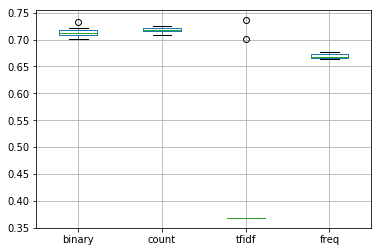

In [153]:
results.boxplot()
plt.show()

In [154]:
###  Predict New Sentiment

In [155]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
#     tokens = clean_doc(review)
    
    tokens = clean_document(text)
    print(tokens)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    max_index = np.argmax(yhat[0])
    print(yhat[0])
    print(yhat[0][max_index])
    # retrieve predicted percentage and label
    percent_pos = yhat[0][max_index]
    if max_index == 0 : 
        return (percent_pos), '0'
    
    if max_index == 1 : 
        return (percent_pos), '1'
    if max_index == 2 : 
        return (percent_pos), '2'
    return "NA"

In [156]:
# test positive text
text = "my leg is getting hell lot of pain whihch is imaginable blood due to pain!!"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'getting', 'hell', 'lot', 'pain', 'whihch', 'imaginable', 'blood', 'due', 'pain']
[5.8799511e-04 8.5197535e-05 2.6998878e-02]
0.026998878


(0.026998878, '2')

In [157]:
# test positive text
text = "my leg is paining alot and it is severe, couldn't bear any more"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.0011202  0.00935899 0.00075021]
0.009358989


(0.009358989, '1')

In [158]:
# test positive text
# text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.0011202  0.00935899 0.00075021]
0.009358989
Review: [my leg is paining alot and it is severe, couldn't bear any more]
Sentiment: 1 (0.936%)
['bad', 'movie']
[4.3933624e-03 5.6821592e-02 1.1326434e-06]
0.056821592
Review: [This is a bad movie.]
Sentiment: 1 (5.682%)


In [159]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 500, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [160]:
len(vocab)

2947

In [161]:
# xtrain_docs

In [162]:
max_length = max([len(s.split()) for s in xtrain_docs])
max_length

104

In [163]:
vocab_size = len(set(vocab))
len(set(vocab))

2947

In [164]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Embedding , Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [165]:
# define modela
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 104, 500)          1473500   
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 97, 32)            128032    
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 41, 32)            8224      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 13, 32)            8224      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 6, 32)             0         
__________

In [166]:
encoded_docs = tokenizer.texts_to_sequences(xtrain_docs)

In [167]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [168]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [169]:
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 104, 500)          1473500   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 97, 32)            128032    
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 41, 32)            8224      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 13, 32)            8224      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 6, 32)             0         
__________

In [170]:
len(xtrain_docs) , len(y_train_docs)

(1151, 1151)

In [171]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=100, verbose=2)
# save the model
# model.save('model_nightingale.h5')

Epoch 1/100
 - 7s - loss: 1.0954 - acc: 0.4023
Epoch 2/100
 - 1s - loss: 1.0279 - acc: 0.5039
Epoch 3/100
 - 1s - loss: 0.8612 - acc: 0.5491
Epoch 4/100
 - 1s - loss: 0.6786 - acc: 0.6238
Epoch 5/100
 - 1s - loss: 0.5634 - acc: 0.6733
Epoch 6/100
 - 1s - loss: 0.5292 - acc: 0.6742
Epoch 7/100
 - 1s - loss: 0.4688 - acc: 0.7011
Epoch 8/100
 - 1s - loss: 0.4353 - acc: 0.7037
Epoch 9/100
 - 1s - loss: 0.4166 - acc: 0.7142
Epoch 10/100
 - 1s - loss: 0.4046 - acc: 0.7220
Epoch 11/100
 - 1s - loss: 0.4113 - acc: 0.7237
Epoch 12/100
 - 1s - loss: 0.4055 - acc: 0.7289
Epoch 13/100
 - 1s - loss: 0.3992 - acc: 0.7202
Epoch 14/100
 - 1s - loss: 0.3994 - acc: 0.7298
Epoch 15/100
 - 1s - loss: 0.4038 - acc: 0.7289
Epoch 16/100
 - 1s - loss: 0.3983 - acc: 0.7324
Epoch 17/100
 - 1s - loss: 0.3995 - acc: 0.7298
Epoch 18/100
 - 1s - loss: 0.3963 - acc: 0.7333
Epoch 19/100
 - 1s - loss: 0.3952 - acc: 0.7315
Epoch 20/100
 - 1s - loss: 0.3957 - acc: 0.7315
Epoch 21/100
 - 2s - loss: 0.3959 - acc: 0.7341
E

In [297]:
import pickle

def save_tokenizer_file(object_, filename):
    # saving
    with open(filename, 'wb') as handle:
        pickle.dump(object_, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer_file(filename):
    # loading
    with open(filename, 'rb') as handle:
        tokenizer = pickle.load(handle)
        return tokenizer
    return null

In [299]:
save_tokenizer_file(tokenizer, 'tokenizer.pkl')
tokenizer = load_tokenizer_file('tokenizer.pkl')
tokenizer

In [295]:
def save_file(data, filename):
    dump(data,filename)
    print('Saved: %s' % filename)

In [172]:
from pickle import dump
# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)
    # load and clean all reviews
#     train_docs, ytrain = load_clean_dataset(True)
#     test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([Xtrain, to_categorical(y_train_docs)], 'train_nightingale.pkl')
save_dataset([Xtest, to_categorical(y_test_docs)], 'test_nightingale.pkl')   


Saved: train_nightingale.pkl
Saved: test_nightingale.pkl


In [173]:
from pickle import load
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
trainLines, trainLabels = load_dataset('train.pkl')

In [204]:
# # This tutorial is divided into the following parts:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [205]:
vocab_size = len(tokenizer.word_index) + 1

In [206]:
vocab_size

2894

In [207]:
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [208]:
trainLines
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [209]:
length = max_length
from numpy import array
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.merge import concatenate
from keras.models import Model

In [210]:
len(trainLabels) , len(xtrain_docs)  , len(y_train_docs)
# len(trainX)

(1151, 1151, 1151)

In [211]:
trainLabels = to_categorical(y_train_docs)

In [212]:
len(y_train_docs)

1151

In [213]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
# fit model
history = model.fit([trainX,trainX,trainX], array(trainLabels), epochs=20, batch_size=16)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 104, 300)     868200      input_13[0][0]                   
__________________________________________________________________________________________________
embedding_

In [224]:
# load the model
from keras.models import load_model
# save the model
model.save('model_multi_nightingale.h5')
model = load_model('model_multi_nightingale.h5')

In [225]:
testX  = encode_docs(tokenizer, max_length, xtest_docs)

In [226]:
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX],to_categorical(y_test_docs), verbose=2)
print('Test Accuracy: %.2f' % (acc*100))

Train Accuracy: 97.65
Test Accuracy: 70.49


#### Build vocab with weights for embedding space generation

In [218]:
import pandas as pd
import numpy as np
from numpy import   asarray,zeros
# load the whole embedding into memory
embeddings_index = dict()
# f = open('/home/surya/cs224n-Squad-Project/data/glove.6B.100d.txt')
f = open('/root/data/glove/glove.6B.300d.txt')


for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [219]:
vocab_size

2894

In [220]:
docs[0]

'female, 55 years, 75 kg and obese. hypertensive 160/110 Hg. doctor prescribes olmesartan , suffering severe headache'

In [221]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(clean_doc_voc)
vocab_size = len(t.word_index) + 1
vocab_size

2948

In [222]:
a = "0.41711,-0.10176,0.058147,-0.18332,-0.44458,-0.17852,-0.34392,-0.077147,0.58521,-0.52752,1.4831,0.9531,-0.027201,-0.31748,-0.23046,-0.24083,0.22548,-0.12685,-0.17578,-0.34924,0.5168,0.86818,-0.018579,1.2228,-0.52477,-0.26369,0.25925,-0.059529,0.27063,0.13036,-0.67677,0.48313,-0.16343,-0.069899,0.92846,-0.44196,-0.078755,0.5246,-0.59577,-0.1659,0.35194,0.30031,-0.50711,0.29111,-0.26332,-1.0523,-0.31061,-0.077155,-0.16019,0.26994,-1.1042,0.16292,0.79396,-0.77135,-0.95157,-0.55992,0.69163,0.021495,0.44292,-0.69881, 0.73889,-0.1064,-0.44058,0.17116,0.39109,0.043652, 1.2835,0.29026,0.51037,-0.19631,0.036696  -0.74017,-0.0035271 -0.54918,-0.25002,0.15853,0.71764,-0.28083, 0.42292,-0.89855,0.99665,-0.65188,-0.11919,-0.28617,-0.85273,0.55656,-0.23601,-0.43822,0.36317,0.45724, 0.38596,0.59233,1.4355,1.4563,1.1801,0.32987, 0.84998,-0.29444,-0.039114,0.39534".split(",")

a = np.array(a)
len(a)

98

In [223]:
# embedding_matrix = zeros((vocab_size, 100))
embedding_matrix = zeros((vocab_size, 300))

for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
#     print((word,i),embedding_vector)
if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [227]:
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)

###  ADD USER DEFINED EMBEDDING FROM GLOVE 

In [228]:
embedding_matrix.shape

(2948, 300)

In [237]:
%timeit 
# np.isnan(data)[np.isnan(data) == False].size
np.isnan(embedding_matrix)[np.isnan(embedding_matrix) == False].size

884400

In [260]:
# t.word_index.items()

In [241]:
# embedding_matrix
np.sum(~embedding_matrix.any(1))

2947

In [234]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0071524 ,  0.36849999,  0.030004  , ...,  0.49214   ,
        -0.14947   , -0.32574001]])

In [246]:
# define the model
def define_model(vocab_size, max_length , custom_embed = True):
    model = Sequential()
#     model.add(Embedding(vocab_size, 100, input_length=max_length))
#     model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length , trainable=False))
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    print("Hello!!!!!!!!!")
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
#     model.layers[0].set_weights([embedding_matrix])
#     model.layers[0].trainable = False
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [259]:
#    #load different embedding file from Kaggle depending on which embedding 
#         #matrix we are going to experiment with
#         if typeToLoad=="glove":
#             EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
#             embed_size = 25
#         elif(typeToLoad=="word2vec"):
#             word2vecDict = word2vec.KeyedVectors.load_word2vec_format("../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)
#             embed_size = 300
#         elif(typeToLoad=="fasttext"):
#             EMBEDDING_FILE='../input/fasttext/wiki.simple.vec'
#             embed_size = 300

#         if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
#             embeddings_index = dict()
#             #Transfer the embedding weights into a dictionary by iterating through every line of the file.
#             f = open(EMBEDDING_FILE)
#             for line in f:
#                 #split up line into an indexed array
#                 values = line.split()
#                 #first index is word
#                 word = values[0]
#                 #store the rest of the values in the array as a new array
#                 coefs = np.asarray(values[1:], dtype='float32')
#                 embeddings_index[word] = coefs #50 dimensions
#             f.close()
#             print('Loaded %s word vectors.' % len(embeddings_index))
#         else:
#             embeddings_index = dict()
#             for word in word2vecDict.wv.vocab:
#                 embeddings_index[word] = word2vecDict.word_vec(word)
#             print('Loaded %s word vectors.' % len(embeddings_index))
            
#         gc.collect()
#         #We get the mean and standard deviation of the embedding weights so that we could maintain the 
#         #same statistics for the rest of our own random generated weights. 
#         all_embs = np.stack(list(embeddings_index.values()))
#         emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
#         nb_words = len(tokenizer.word_index)
#         #We are going to set the embedding size to the pretrained dimension as we are replicating it.
#         #the size will be Number of Words in Vocab X Embedding Size
#         embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
#         gc.collect()

#         #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
#         #our own dictionary and loaded pretrained embedding. 
#         embeddedCount = 0
#         for word, i in tokenizer.word_index.items():
#             i-=1
#             #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
#             embedding_vector = embeddings_index.get(word)
#             #and store inside the embedding matrix that we will train later on.
#             if embedding_vector is not None: 
#                 embedding_matrix[i] = embedding_vector
#                 embeddedCount+=1
#         print('total embedded:',embeddedCount,'common words')
        
#         del(embeddings_index)
#         gc.collect()
        
#         #finally, return the embedding matrix
#         return embedding_matrix

IndentationError: unexpected indent (<ipython-input-259-95010fed5cda>, line 3)

In [247]:
max_length

104

In [248]:
model = define_model(vocab_size,max_length,True)
model.fit(Xtrain, to_categorical(y_train_docs), epochs=20, verbose=2, validation_split=0.1)

Hello!!!!!!!!!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 104, 300)          884400    
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 97, 32)            76832     
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1536)              0         
_________________________________________________________________
dense_205 (Dense)            (None, 10)                15370     
_________________________________________________________________
dense_206 (Dense)            (None, 3)                 33        
Total params: 976,635
Trainable params: 976,635
Non-trainable params: 0
_______________________________________________________

In [253]:
model.metrics_names

['loss', 'acc']

dict_keys(['loss', 'acc'])


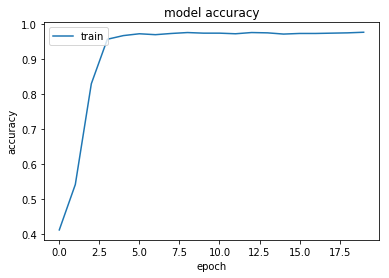

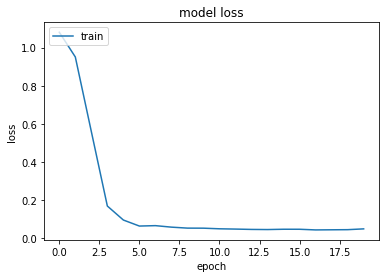

In [257]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [270]:
# # This tutorial is divided into the following parts:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
#     embedding1 = Embedding(vocab_size,  300, weights=[embedding_matrix], trainable=False)(inputs1)
#         model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length , trainable=False))

    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
#     embedding2 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
#     embedding3 = Embedding(vocab_size, 100)(embedding3)
#     embedding3 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs3)

    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [271]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)

In [272]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(trainLabels), epochs=100, batch_size=16 , )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, 104)          0                                            
__________________________________________________________________________________________________
embedding_38 (Embedding)        (None, 104, 300)     884400      input_21[0][0]                   
__________________________________________________________________________________________________
embedding_

1151/1151 [==============================] - 3s 2ms/step - loss: 0.0396 - acc: 0.9696
Epoch 36/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0422 - acc: 0.9757
Epoch 37/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0393 - acc: 0.9757
Epoch 38/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0409 - acc: 0.9661
Epoch 39/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0446 - acc: 0.9748
Epoch 40/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0391 - acc: 0.9748
Epoch 41/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0426 - acc: 0.9783
Epoch 42/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0402 - acc: 0.9722
Epoch 43/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0421 - acc: 0.9722
Epoch 44/100
1151/1151 [==============================] - 3s 2ms/step - loss: 0.0482 - acc: 0.9687
Epoch 45/100
1151/1151 

In [286]:
keras_model = model
import tensorflow as tf

In [292]:
# saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")


In [294]:
! ls -ltr /home/surya/model_multi_nightingale.h5
/
!pwd

-rw-r--r--. 1 root root  7040824 May 14 16:58 model_98.h5
-rw-r--r--. 1 root root 20628648 May 14 18:21 model.h5
-rw-r--r--. 1 root root 20628648 May 14 18:24 model_multi.h5
-rw-r--r--. 1 root root  2649064 May 20 17:27 model_nightingale.h5
-rw-r--r--. 1 root root 33960888 May 22 15:27 model_multi_nightingale.h5
/home/surya


In [288]:
with tf.keras.backend.get_session() as sess:
    tf.saved_model.simple_save(
        sess,
        "export_path",
        inputs={'input': keras_model.input},
        outputs={'output': keras_model.output})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


AttributeError: 'list' object has no attribute 'dtype'

In [281]:
from tensorflow import keras
from tensorflow.keras import layers

In [282]:
keras.experimental.export_saved_model(model, '/home/surya/saved_model')


AttributeError: module 'tensorflow._api.v1.keras.experimental' has no attribute 'export_saved_model'

In [ ]:
# Export the model to a SavedModel
keras.experimental.export_saved_model(model, 'path_to_saved_model')

# Recreate the exact same model
new_model = keras.experimental.load_from_saved_model('path_to_saved_model')

# Check that the state is preserved
new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, atol=1e-6)

# Note that the optimizer state is preserved as well:
# you can resume training where you left off.

In [276]:


with mlflow.start_run() as run:
    mlflow.keras.log_model(model, "models")

AttributeError: module 'mlflow' has no attribute 'keras'

In [275]:
# model
mlflow.keras.save_model(model, "models_keras")

AttributeError: module 'mlflow' has no attribute 'keras'

In [ ]:
>>> import mlflow
>>> # Build, compile, and train your model
>>> keras_model = ...
>>> keras_model_path = ...
>>> keras_model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
>>> results = keras_model.fit(
...     x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_val, y_val))
... # Save the model as an MLflow Model
>>> mlflow.keras.save_model(keras_model, keras_model_path)